# Cosine Similarity Search based on Generated DOC2VEC Model

Please Enter the Claims: electr vacuum cleaner drive electr blower suck contain dust pass airthrough suction passag discharg electr vacuum cleaner compris generat generat posit ion negat ion airborn germ present kill posit negat ion electr vacuum cleaner accord claim ion generat generat suction passag cancel electr vacuum cleaner accord claim generat dispos away heat sourc insid bodi electr vacuum cleaner electr vacuum cleaner drive electr blower suck discharg electr vacuum cleaner compris generat generat posit ion negat ion discharg electr vacuum cleaner mix posit negat ion airborn germ present kill posit negat ion electr vacuum cleaner accord claim suck electr vacuum cleaner discharg electr vacuum cleaner pass purif filter mix ion pass purif filter cancel devic accord claim generat generat rate concentr posit negat ion ion posit away generat electr vacuum cleaner caster arrang face bodi have electr blower hous exhaust electr blower ventil open form caster compris generat generat posi

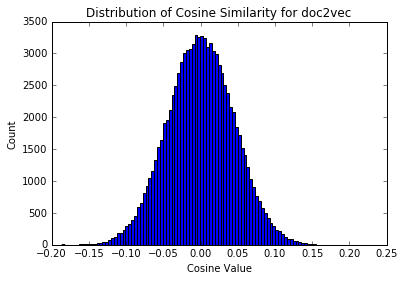

Similarity Value= 0.201308384538
Similarity Value= 0.195726916194
Similarity Value= 0.195308879018
Similarity Value= 0.193808317184
Similarity Value= 0.193663850427
Similarity Value= 0.190225616097
Similarity Value= 0.182081907988
Similarity Value= 0.180912256241
Similarity Value= 0.178206890821
Similarity Value= 0.174760058522






In [24]:
import glob
import timeit
from numpy import dot
from gensim import utils, matutils
from scipy import spatial

import pandas as pd
import numpy as np
import math
from sklearn.utils import shuffle
import csv

from scipy import stats
import scipy.optimize
from IPython.display import display, HTML

import nltk


import collections
import itertools
import os
import re
import sys
import time

import collections
from itertools import chain

import gensim
from gensim.models import Doc2Vec
from multiprocessing import cpu_count

from scipy import stats, integrate
import matplotlib.pyplot as plt

%matplotlib inline

##################################################################################################################
# Some basic stipping out to reduce vocabulary size
##################################################################################################################
# Strip out punctuations
import string
punctuations = list(string.punctuation)
punctuations.append("''")


# Function to stip out non-ASIC characters
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)


##################################################################################################################
# Code Start
##################################################################################################################

s = raw_input("Please Enter the Claims: ")
new_claim = strip_non_ascii(s)
new_claim = [i for i in nltk.word_tokenize(new_claim) if i not in punctuations]
new_claim = " ".join(new_claim)

top_cluster = raw_input("Top Cluster: ")
sub_cluster = raw_input("Sub Cluster: ")
topn = int(raw_input("Top Matches: "))


cosine_sim_array_doc2vec = []


model_name = "MODELS/small_cluster_data_"+top_cluster+"_"+sub_cluster+"_train"


# Load the model
doc2vec_model = Doc2Vec.load(model_name)
    
# CSV file processing
csv_file = model_name.split("/")
csv_file = csv_file[1].split("_train")
csv_file = "CSV/"+csv_file[0]+".csv"

    
df_full = pd.read_csv(csv_file)
df_full = df_full[df_full['claim_text_stemmed'].notnull()]
df_full = df_full[df_full['appl_doc_number'].notnull()]    
df_full = df_full.drop_duplicates(subset=[ 'claim_text_stemmed'], keep=False)
# Get the number of sentences
claims_range = len(df_full)
df_all = df_full 
print model_name, "->Claims Length =", claims_range

# Get all the claims to create a corpus
claims_array = []
# Stip out items in the claims array
for i in range(claims_range):
    claim = df_full.iloc[i]['claim_text_stemmed']
    # Remove non-ASCII characters
    claim=strip_non_ascii(claim)
    # Strip out punctuations
    claim = [i for i in nltk.word_tokenize(claim) if i not in punctuations]
    # Put them back as a sentence again
    claim = " ".join(claim)
    claims_array.append(claim)

# Get the array range 
final_claims_range = len(claims_array)

new_claims_array = claims_array
new_claims_range = len(new_claims_array)

# Doc2vec section
doc2vec_words = []
for f in range(new_claims_range):
    doc2vec_words.append(new_claims_array[f])
    doc2vec_words.append('\n')
    

doc2vec_words = list(chain.from_iterable(doc2vec_words))
doc2vec_words = ''.join(doc2vec_words)[:-1]

# Build the sentences
doc2vec_sentences = doc2vec_words.split('\n')    
    
    
start_time = timeit.default_timer()

vec1 = doc2vec_model.infer_vector(nltk.word_tokenize(new_claim), alpha=0.025, steps=10)
for i in range(new_claims_range):
    vec2 = doc2vec_model.infer_vector(nltk.word_tokenize(doc2vec_sentences[i]), alpha=0.025, steps=10)
    cosine_sim_array_doc2vec.append(1 - spatial.distance.cosine(vec1, vec2))
    #if i  % 1000 == 0:
        #print 'Processed records:', i
print "Total Records processed:", i
            
elapsed = timeit.default_timer() - start_time
print "Elapsed Time = ",elapsed

doc2vec_reorder = sorted(enumerate(cosine_sim_array_doc2vec), key = lambda x: x[1], reverse=True)
    
    
plt.hist(cosine_sim_array_doc2vec, 100)
plt.xlabel('Cosine Value')
plt.ylabel('Count')
plt.title('Distribution of Cosine Similarity for doc2vec')
plt.show()


    
for i in range(topn):
    print "Similarity Value=", doc2vec_reorder[i][1]
    


print ""
print ""
print ""
print ""